In [19]:
import cv2
import torchvision.transforms as transforms
from src.models.metrics import TemporalConsistency

In [20]:
prev_image =  cv2.imread(r"..\data\test_data\metrics\images\2.png")
cur_image = cv2.imread(r"..\data\test_data\metrics\images\3.png")
prev_mask = cv2.imread(r"..\data\test_data\metrics\masks\2.png")
cur_mask = cv2.imread(r"..\data\test_data\metrics\masks\3.png")

In [21]:
cur_mask.shape

(600, 800, 3)

In [22]:
prev_image = cv2.cvtColor(prev_image, cv2.COLOR_BGR2RGB)
cur_image = cv2.cvtColor(cur_image, cv2.COLOR_BGR2RGB)
prev_mask = cv2.cvtColor(prev_mask, cv2.COLOR_BGR2GRAY)
cur_mask = cv2.cvtColor(cur_mask, cv2.COLOR_BGR2GRAY)

In [23]:
to_tensor = transforms.ToTensor()
prev_image, cur_image = to_tensor(prev_image), to_tensor(cur_image) 
prev_mask, cur_mask = to_tensor(prev_mask), to_tensor(cur_mask) 

In [24]:
prev_image, cur_image = prev_image.unsqueeze(0), cur_image.unsqueeze(0)
prev_mask, cur_mask = prev_mask.unsqueeze(0), cur_mask.unsqueeze(0)

In [25]:
tc = TemporalConsistency()
tc_num, warped_frame = tc(prev_image, cur_image, prev_mask, cur_mask)

C:\Internship\ITMO_ML\CTCI\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Internship\ITMO_ML\CTCI\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Raft_Large_Weights.C_T_SKHT_V2`. You can also use `weights=Raft_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Internship\ITMO_ML\CTCI\venv\lib\site-packages\torch\nn\functional.py:4316: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


In [26]:
print(tc_num)

tensor(0.3859)


In [27]:
print(warped_frame.shape)

torch.Size([1, 1, 600, 800])


In [28]:
print(warped_frame.min(), warped_frame.max())

tensor(0.) tensor(1.)


In [29]:
warped_frame = warped_frame.detach().squeeze().numpy()

In [30]:
import matplotlib.pyplot as plt

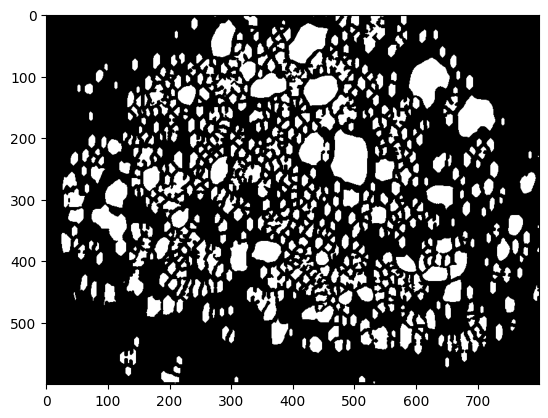

In [31]:
plt.imshow(cur_mask.detach().squeeze().numpy(), cmap='gray')

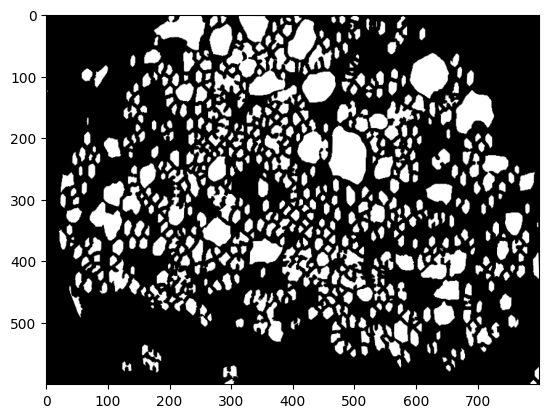

In [32]:
plt.imshow(warped_frame, cmap='gray')

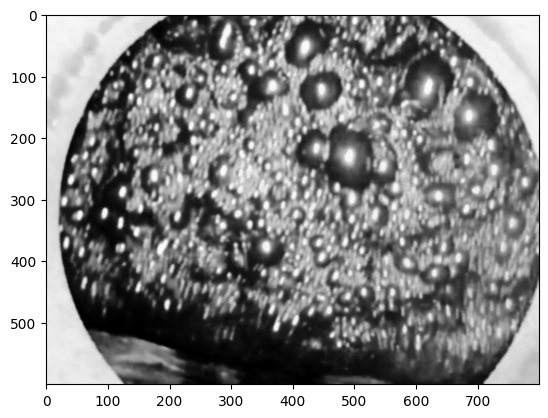

In [33]:
plt.imshow(cur_image.detach().squeeze().permute(1, 2, 0).numpy())

In [34]:
from src.models.metrics import IoUMetric

In [35]:
iou_metric = IoUMetric()

In [36]:
iou_metric(cur_mask, cur_mask)

tensor(1.)